# Getting the data

In [ ]:
# Tratamiento de datos e importación del dataset
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

Mounted at /content/drive


In [ ]:

# TRACK CSV DATASET
#tracks = pd.read_csv('/content/drive/MyDrive/ICESI/Semestre 11/Inteligencia Artificial/Proyecto Final IA 2023-2/Entrega 2/Data/fma-rock-vs-hiphop.csv')
tracks = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/fma-rock-vs-hiphop.csv')
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [ ]:
# TRACK METRICS JSON DATASET
#metrics = pd.read_json('/content/drive/MyDrive/ICESI/Semestre 11/Inteligencia Artificial/Proyecto Final IA 2023-2/Entrega 2/Data/echonest-metrics.json')
metrics = pd.read_json('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/echonest-metrics.json')
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
# Merge the datasets by track_id
track_metrics=pd.merge(tracks,metrics)
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   composer          106 non-null    object 
 4   date_created      4802 non-null   object 
 5   date_recorded     1234 non-null   object 
 6   duration          4802 non-null   int64  
 7   favorites         4802 non-null   int64  
 8   genre_top         4802 non-null   object 
 9   genres            4802 non-null   object 
 10  genres_all        4802 non-null   object 
 11  information       334 non-null    object 
 12  interest          4802 non-null   int64  
 13  language_code     2599 non-null   object 
 14  license           4789 non-null   object 
 15  listens           4802 non-null   int64  
 16  lyricist          13 non-null     object 


In [ ]:
# Get rid of the unnecesary variables
track_metrics = track_metrics.drop(['track_id', 'bit_rate', 'comments', 'composer', 'interest', 'date_created', 'date_recorded','favorites','genres', 'genres_all', 'information', 'language_code', 'license', 'lyricist', 'number', 'publisher', 'tags'], axis=1)
track_metrics.head(1)

,duration,genre_top,listens,title,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,405,Rock,424,Hundred-Year Flood,0.988306,0.255661,0.979774,0.973006,0.121342,0.05174,90.241,0.034018


In [ ]:
#Obtain the 2000s spotify songs dataset
#spotify2000data = pd.read_csv('/content/drive/MyDrive/ICESI/Semestre 11/Inteligencia Artificial/Proyecto Final IA 2023-2/Entrega 2/Data/Spotify-2000.csv')
spotify2000data = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/Spotify-2000.csv')
spotify2000data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
# change column Top Genre to genre_top in dataset spotify2000data
spotify2000data.rename(columns={'Top Genre':'genre_top'}, inplace=True)
spotify2000data['genre_top'].value_counts().sort_values(ascending = False)

album rock              413
adult standards         123
dutch pop                88
alternative rock         86
dance pop                83
                       ... 
happy hardcore            1
australian americana      1
electro house             1
afropop                   1
bebop                     1
Name: genre_top, Length: 149, dtype: int64

In [ ]:
# rows with genre_top containing rock or hip hop
for i in range(0,len(spotify2000data)):
    if ('rock' in spotify2000data['genre_top'][i]):
        spotify2000data['genre_top'][i] = 'Rock'

    elif ('hip hop' in spotify2000data['genre_top'][i]):
        spotify2000data['genre_top'][i] = 'Hip-Hop'
    else:
        spotify2000data.drop(i, inplace=True)

<ipython-input-8-0b573c6aabc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['genre_top'][i] = 'Rock'
<ipython-input-8-0b573c6aabc7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['genre_top'][i] = 'Hip-Hop'
<ipython-input-8-0b573c6aabc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['genre_top'][i] = 'Rock'
<ipython-input-8-0b573c6aabc7>:4: SettingWithCopyWarning: 
A value is try

In [ ]:
spotify2000data['genre_top'].value_counts().sort_values(ascending = False)

Rock       857
Hip-Hop     29
Name: genre_top, dtype: int64

In [ ]:
# Get rid of the unnecesary variables in spotify2000data
spotify2000data = spotify2000data.drop(['Index', 'Artist', 'Popularity', 'Year'], axis=1)

# Change names of dataset columns to match with the original dataset in order to merge properly
spotify2000data.rename(columns={'Title':'title'}, inplace=True)
spotify2000data.rename(columns={'Beats Per Minute (BPM)':'tempo'}, inplace=True)
spotify2000data.rename(columns={'Energy':'energy'}, inplace=True)
spotify2000data.rename(columns={'Danceability':'danceability'}, inplace=True)
spotify2000data.rename(columns={'Loudness (dB)':'loudness'}, inplace=True)
spotify2000data.rename(columns={'Liveness':'liveness'}, inplace=True)
spotify2000data.rename(columns={'Valence':'valence'}, inplace=True)
spotify2000data.rename(columns={'Length (Duration)':'duration'}, inplace=True)
spotify2000data.rename(columns={'Acousticness':'acousticness'}, inplace=True)
spotify2000data.rename(columns={'Speechiness':'speechiness'}, inplace=True)

spotify2000data.head(1)

,title,genre_top,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness
1,Black Night,Rock,135,79,50,-11,17,81,207,17,7


In [ ]:
# Finally, we want to remove numbers with commas in order to make an integer conversion to keep the duration as a int64 data type
for i in spotify2000data.index:
    if (',' in spotify2000data['duration'][i]):
        spotify2000data['duration'][i] = spotify2000data['duration'][i].replace(",","")

# We apply the conversion
spotify2000data['duration'] = spotify2000data['duration'].astype(str).astype(int)

# Verify the conversion
spotify2000data.dtypes

<ipython-input-11-09a6db31a34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify2000data['duration'][i] = spotify2000data['duration'][i].replace(",","")


title           object
genre_top       object
tempo            int64
energy           int64
danceability     int64
loudness         int64
liveness         int64
valence          int64
duration         int64
acousticness     int64
speechiness      int64
dtype: object

In [ ]:
# Concat the datasets
track_metrics=pd.concat([track_metrics,spotify2000data])
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5688 entries, 0 to 1991
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          5688 non-null   int64  
 1   genre_top         5688 non-null   object 
 2   listens           4802 non-null   float64
 3   title             5688 non-null   object 
 4   acousticness      5688 non-null   float64
 5   danceability      5688 non-null   float64
 6   energy            5688 non-null   float64
 7   instrumentalness  4802 non-null   float64
 8   liveness          5688 non-null   float64
 9   speechiness       5688 non-null   float64
 10  tempo             5688 non-null   float64
 11  valence           5688 non-null   float64
 12  loudness          886 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 622.1+ KB


In [ ]:
#Obtain the genre spotify songs dataset
#spotifygenredata = pd.read_csv('/content/drive/MyDrive/ICESI/Semestre 11/Inteligencia Artificial/Proyecto Final IA 2023-2/Entrega 2/Data/genres_v2.csv')
spotifygenredata = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/genres_v2.csv')
spotifygenredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

<ipython-input-13-f24118a5713b>:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  spotifygenredata = pd.read_csv('/content/drive/MyDrive/Proyecto Final IA 2023-2/Entrega 2/Data/genres_v2.csv')


In [ ]:
# Get rid of the unnecesary variables in spotifygenredata
spotifygenredata = spotifygenredata.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'title','time_signature','Unnamed: 0'], axis=1)

# Change column genre to genre_top in dataset spotifygenredata
spotifygenredata.rename(columns={'genre':'genre_top'}, inplace=True)

# Change column song_name to title in dataset spotifygenredata
spotifygenredata.rename(columns={'song_name':'title'}, inplace=True)

# Change column duration_ms to duration in dataset spotifygenredata
spotifygenredata.rename(columns={'duration_ms':'duration'}, inplace=True)

spotifygenredata.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre_top,title
0,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,124539,Dark Trap,Mercury: Retrograde


In [ ]:
# Check the genres and their respective amounts
spotifygenredata["genre_top"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre_top, dtype: int64

In [ ]:
# Join trap and hip hop into the Hip-Hop super genre
spotifygenredata = spotifygenredata.replace("Hiphop", "Hip-Hop")
spotifygenredata = spotifygenredata.replace("trap", "Hip-Hop")

spotifygenredata["genre_top"].value_counts()

Hip-Hop            6015
Underground Rap    5875
Dark Trap          4578
trance             2999
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre_top, dtype: int64

In [ ]:
# Discard all the other genres that we won't use
for i in range(0,len(spotifygenredata)):
    if ('Hip-Hop' not in spotifygenredata['genre_top'][i]):
        spotifygenredata.drop(i, inplace=True)
spotifygenredata["genre_top"].value_counts()

Hip-Hop    6015
Name: genre_top, dtype: int64

In [ ]:
# Concat the datasets
track_metrics=pd.concat([track_metrics,spotifygenredata])
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11703 entries, 0 to 36402
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          11703 non-null  int64  
 1   genre_top         11703 non-null  object 
 2   listens           4802 non-null   float64
 3   title             8710 non-null   object 
 4   acousticness      11703 non-null  float64
 5   danceability      11703 non-null  float64
 6   energy            11703 non-null  float64
 7   instrumentalness  10817 non-null  float64
 8   liveness          11703 non-null  float64
 9   speechiness       11703 non-null  float64
 10  tempo             11703 non-null  float64
 11  valence           11703 non-null  float64
 12  loudness          6901 non-null   float64
 13  key               6015 non-null   float64
 14  mode              6015 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
# Check for null values
aux = track_metrics.isna().sum()
aux

duration               0
genre_top              0
listens             6901
title               2993
acousticness           0
danceability           0
energy                 0
instrumentalness     886
liveness               0
speechiness            0
tempo                  0
valence                0
loudness            4802
key                 5688
mode                5688
dtype: int64

In [ ]:
# Percentage of null values
aux = track_metrics.isna().sum()

for i in range(len(aux)):
    print(aux.index[i] + '\t'+ '{:.4f} %'.format(100* (aux.values[i]/track_metrics.shape[0])))
    #100*(6/398)

duration	0.0000 %
genre_top	0.0000 %
listens	58.9678 %
title	25.5746 %
acousticness	0.0000 %
danceability	0.0000 %
energy	0.0000 %
instrumentalness	7.5707 %
liveness	0.0000 %
speechiness	0.0000 %
tempo	0.0000 %
valence	0.0000 %
loudness	41.0322 %
key	48.6029 %
mode	48.6029 %


In [ ]:
# Check for repeated values
track_metrics.duplicated().sum()

825

In [ ]:
# Remove duplicated entries
track_metrics = track_metrics.drop_duplicates()
# Basic statistics of the dataset
track_metrics.describe()

,duration,listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,loudness,key,mode
count,10878.000000,4802.000000,10878.000000,10878.000000,10878.000000,9992.000000,10878.000000,10878.000000,10878.000000,10878.000000,6076.000000,5190.000000,5190.000000
mean,108194.003585,1091.146189,2.229209,4.788543,5.711586,0.339926,1.772913,0.564498,140.319705,4.644293,-5.811186,5.315222,0.557033
std,119017.604166,7490.835102,9.770251,14.850843,17.892257,0.395709,7.185306,1.924831,32.481955,15.776881,3.564502,3.732486,0.496784
min,18.000000,12.000000,0.000000,0.051307,0.000279,0.000000,0.021900,0.022700,29.093000,0.014392,-24.694000,0.000000,0.000000
25%,205.000000,194.250000,0.013244,0.419184,0.564000,0.000010,0.107290,0.047245,117.196250,0.248000,-7.933000,1.000000,0.000000
50%,458.000000,395.000000,0.154000,0.588000,0.758033,0.052700,0.151222,0.106942,144.948000,0.463789,-5.447500,6.000000,1.000000
75%,221769.750000,867.750000,0.716101,0.745000,0.925000,0.812313,0.336158,0.297000,160.127500,0.698477,-3.174000,9.000000,1.000000
max,723573.000000,433992.000000,98.000000,95.000000,99.000000,0.993134,99.000000,55.000000,250.059000,99.000000,1.851000,11.000000,1.000000


In [ ]:
# Here is how many times the Rock and Hip Hop genre appear respectively
track_metrics['genre_top'].value_counts().sort_values(ascending = False)

Hip-Hop    6129
Rock       4749
Name: genre_top, dtype: int64

In [ ]:
# We use a simple imputer to get rid of null values in the training variables that we are going to use in our model
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
training_variables = ['listens', 'acousticness',
       'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness',
       'tempo', 'valence', 'loudness']
for i in training_variables:
  track_metrics[i] = imputer.fit_transform(track_metrics[[i]]).ravel()
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10878 entries, 0 to 36402
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          10878 non-null  int64  
 1   genre_top         10878 non-null  object 
 2   listens           10878 non-null  float64
 3   title             8646 non-null   object 
 4   acousticness      10878 non-null  float64
 5   danceability      10878 non-null  float64
 6   energy            10878 non-null  float64
 7   instrumentalness  10878 non-null  float64
 8   liveness          10878 non-null  float64
 9   speechiness       10878 non-null  float64
 10  tempo             10878 non-null  float64
 11  valence           10878 non-null  float64
 12  loudness          10878 non-null  float64
 13  key               5190 non-null   float64
 14  mode              5190 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.3+ MB


<ipython-input-25-efa635ab3bdd>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(track_metrics.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')


<Axes: >

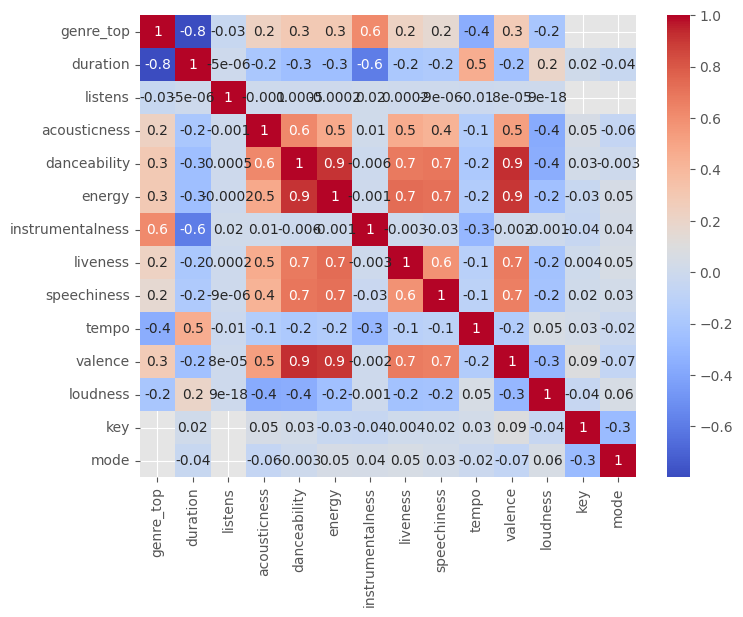

In [ ]:
# We first do a binary transformation of the genre_top column, in this case:
# Hip-Hop = 0
# Rock = 1
temp = pd.get_dummies(track_metrics['genre_top'])
df_two = pd.concat((temp, track_metrics), axis=1)
df_two = df_two.drop(["genre_top"], axis=1)
df_two = df_two.drop(["Hip-Hop"], axis=1)
track_metrics = df_two.rename(columns={"Rock": "genre_top"})

# Evaluate correlation
plt.figure(figsize=(8,6))
sns.heatmap(track_metrics.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

In [ ]:
# Lastly, we get rid of listens, key and mode given as how they are not pertinent for the analysis
track_metrics = track_metrics.drop(['listens', 'key', 'mode'], axis=1)
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10878 entries, 0 to 36402
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_top         10878 non-null  uint8  
 1   duration          10878 non-null  int64  
 2   title             8646 non-null   object 
 3   acousticness      10878 non-null  float64
 4   danceability      10878 non-null  float64
 5   energy            10878 non-null  float64
 6   instrumentalness  10878 non-null  float64
 7   liveness          10878 non-null  float64
 8   speechiness       10878 non-null  float64
 9   tempo             10878 non-null  float64
 10  valence           10878 non-null  float64
 11  loudness          10878 non-null  float64
dtypes: float64(9), int64(1), object(1), uint8(1)
memory usage: 1.0+ MB


In [ ]:
# Compare every variable with each other
sns.pairplot(track_metrics, hue="genre_top", palette="hls")

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7cde8a0d92d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
def outliers(df, atribute):

    arr1 = df[atribute].values

    # Encontrar el 1st quartil
    q1 = np.quantile(arr1, 0.25)

    # Encontrar el 3rd quartil
    q3 = np.quantile(arr1, 0.75)

    # Encontrar el 2nd quartil
    med = np.median(arr1)

    # Encontrar el rango inter quartil (iqr)
    iqr = q3-q1

    # Encontrar los bigotes superior e inferior
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers_l = arr1[(arr1 <= lower_bound)]
    outliers_u = arr1[(arr1 >= upper_bound)]



    outliers_l_p = (outliers_l.size/len(df[atribute]))*100
    outliers_u_p = (outliers_u.size/len(df[atribute]))*100


    if(outliers_l.size != 0):
      print('Lower outliers in {} represent {:.4f}% of data'.format(atribute,outliers_l_p))
      print('Lower outliers in {} : {}'.format(atribute,outliers_l))
    if(outliers_u.size != 0):
      print('Upper outliers in {} represent {:.4f}% of data'.format(atribute,outliers_u_p))
      print('Upper outliers in {} : {}'.format(atribute,outliers_u))

Now we look to evaluate different models to find the one that best solves this problem. Firstly, we define said models along with the metrics and graphs that are going to help us analyze it:

In [ ]:
# This function is created to graph both the ROC curve with AUC and the precision-recall curve
# given the train and test dataset genres and the probabilities for each of the TWO classes (Hip-Hop or Rock) to be predicted in each one.
def plot_curves(y, y_pred_proba_pair):
  count = 1
  fig, axs = plt.subplots(2, 2, figsize=(10, 6))
  fig.tight_layout(pad=5.0)
  for y_pred_proba in y_pred_proba_pair:
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y[count-1], y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    axs[0, count-1].plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
    axs[0, count-1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axs[0, count-1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    if count == 1:
      axs[0, count-1].set_title('Train Dataset ROC Curve')
    else:
      axs[0, count-1].set_title('Test Dataset ROC Curve')
    axs[0, count-1].legend(loc='lower right')

    #PCR
    # Calculate PCR
    precision, recall, thresholds = precision_recall_curve(y[count-1], y_pred_proba)

    # Plot the precision recall curve

    axs[1, count-1].plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve')
    axs[1, count-1].set(xlabel='Recall', ylabel='Precision')
    if count == 1:
      axs[1, count-1].set_title('Train Dataset Precision-Recall Curve')
    else:
      axs[1, count-1].set_title('Test Dataset Precision-Recall Curve')
    axs[1, count-1].legend(loc='lower left')

    count += 1

In [ ]:
# Random forest function
def random_forest(x_train, y_train, x_test, y_test):
  # select criterion
  criterion = ['gini', 'entropy']
  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
  # Number of features to consider at every split
  max_features = ['sqrt']
  # Maximum number of levels in tree
  max_depth = range(2,5)
  # Minimum number of samples required to split a node
  min_samples_split = range(2,6)
  # Minimum number of samples required at each leaf node
  min_samples_leaf = range(1,3)
  # Method of selecting samples for training each tree
  bootstrap = [True, False]

  param_grid = {'criterion' : criterion,
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
  rf_Model = RandomForestClassifier()
  rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = StratifiedKFold(), n_jobs=4)
  rf_Grid.fit(x_train, y_train)

  #check best hyperparameters
  print("Best hyperparameters:", rf_Grid.best_params_)

  y_pred_train = rf_Grid.best_estimator_.predict(x_train)
  y_pred_test = rf_Grid.best_estimator_.predict(x_test)

  print("Confusion matrix for training data")
  cm = confusion_matrix(y_train, y_pred_train)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Confusion matrix for testing data")
  cm = confusion_matrix(y_test, y_pred_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Metrics for training data:")
  print(classification_report(y_train,rf_Grid.best_estimator_.predict(x_train)))

  print("Metrics for testing data")
  print(classification_report(y_test,rf_Grid.best_estimator_.predict(x_test)))

  # Final part of the analysis is to calculate the ROC and Precision-Recall curves
  plot_curves([y_train , y_test], [rf_Grid.predict_proba(x_train)[:, 1], rf_Grid.predict_proba(x_test)[:, 1]])

In [ ]:
# Naive bayes function
def naive_bayes(x_train, y_train, x_test, y_test):
  param_grid_nb = {
      'var_smoothing': np.logspace(0,-12, num=100)
  }
  nb_Model = GaussianNB()
  nb_Grid = GridSearchCV(estimator = nb_Model, param_grid = param_grid_nb, cv = StratifiedKFold(), n_jobs = 4)
  nb_Grid.fit(x_train, y_train)

  #chek best hiperparameters
  print("Best hyperparameters:", nb_Grid.best_params_)

  y_pred_train = nb_Grid.best_estimator_.predict(x_train)
  y_pred_test = nb_Grid.best_estimator_.predict(x_test)

  print("Confusion matrix for training data")
  cm = confusion_matrix(y_train, y_pred_train)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Metrics for testing data")
  cm = confusion_matrix(y_test, y_pred_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Metrics for training data:")
  print(classification_report(y_train,nb_Grid.best_estimator_.predict(x_train)))

  print("Metrics for testing data")
  print(classification_report(y_test,nb_Grid.best_estimator_.predict(x_test)))

  # Final part of the analysis is to calculate the ROC and Precision-Recall curves
  plot_curves([y_train , y_test], [nb_Grid.predict_proba(x_train)[:, 1], nb_Grid.predict_proba(x_test)[:, 1]])

In [ ]:
# Logistic regression function
def logistic_regression(x_train, y_train, x_test, y_test):
  param_grid_lr={
      "C": np.logspace(-4, 4, 20),
      "penalty": ["none","l2"],
      "max_iter": [1000, 1500, 2000]
  }
  lr_Model = LogisticRegression(solver='lbfgs')
  lr_Grid = GridSearchCV(estimator = lr_Model, param_grid = param_grid_lr, cv = StratifiedKFold(), n_jobs=4)
  lr_Grid.fit(x_train, y_train)

  #check best hyperparameters
  print("Best hyperparameters:", lr_Grid.best_params_)

  y_pred_train = lr_Grid.best_estimator_.predict(x_train)
  y_pred_test = lr_Grid.best_estimator_.predict(x_test)

  print("Confusion matrix for training data")
  cm = confusion_matrix(y_train, y_pred_train)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Confusion matrix for testing data")
  cm = confusion_matrix(y_test, y_pred_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Metrics for training data:")
  print(classification_report(y_train,lr_Grid.best_estimator_.predict(x_train)))

  print("Metrics for testing data")
  print(classification_report(y_test,lr_Grid.best_estimator_.predict(x_test)))

  # Final part of the analysis is to calculate the ROC and Precision-Recall curves
  plot_curves([y_train , y_test], [lr_Grid.predict_proba(x_train)[:, 1], lr_Grid.predict_proba(x_test)[:, 1]])

In [ ]:
# KNN function
def knn(x_train, y_train, x_test, y_test):
  param_grid_knn = {
        'n_neighbors': range(2,13),
        'metric': ['minkowski', 'euclidean', 'manhattan'],
        'p': range(2,11),
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
  }
  knn_Model = KNeighborsClassifier()
  knn_Grid = GridSearchCV(estimator = knn_Model, param_grid = param_grid_knn, cv = StratifiedKFold(), n_jobs=4)
  knn_Grid.fit(x_train, y_train)

  #check best hyperparameters
  print("Best hyperparameters:", knn_Grid.best_params_)

  y_pred_train = knn_Grid.best_estimator_.predict(x_train)
  y_pred_test = knn_Grid.best_estimator_.predict(x_test)

  print("Metrics for training data")
  cm = confusion_matrix(y_train, y_pred_train)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Confusion matrix for testing data")
  cm = confusion_matrix(y_test, y_pred_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Metrics for training data:")
  print(classification_report(y_train,knn_Grid.best_estimator_.predict(x_train)))

  print("Metrics for testing data")
  print(classification_report(y_test,knn_Grid.best_estimator_.predict(x_test)))

  # Final part of the analysis is to calculate the ROC and Precision-Recall curves
  plot_curves([y_train , y_test], [knn_Grid.predict_proba(x_train)[:, 1], knn_Grid.predict_proba(x_test)[:, 1]])

In [ ]:
# decision tree function
def decision_tree(x_train, y_train, x_test, y_test):
  param_grid_dt = {
          'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': range(2,7)
  }
  dt_Model = DecisionTreeClassifier()
  dt_Grid = GridSearchCV(estimator = dt_Model, param_grid = param_grid_dt, cv = 3, verbose=2, n_jobs = 4)
  dt_Grid.fit(x_train, y_train)

  #chek best hiperparameters
  print("Best hyperparameters:", dt_Grid.best_params_)

  y_pred_train = dt_Grid.best_estimator_.predict(x_train)
  y_pred_test = dt_Grid.best_estimator_.predict(x_test)

  print("Confusion matrix for training data")
  cm = confusion_matrix(y_train, y_pred_train)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Confusion matrix for testing data")
  cm = confusion_matrix(y_test, y_pred_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  print("Metrics for training data:")
  print(classification_report(y_train,dt_Grid.best_estimator_.predict(x_train)))

  print("Metrics for testing data")
  print(classification_report(y_test,dt_Grid.best_estimator_.predict(x_test)))

  # Final part of the analysis is to calculate the ROC and Precision-Recall curves
  plot_curves([y_train , y_test], [dt_Grid.predict_proba(x_train)[:, 1], dt_Grid.predict_proba(x_test)[:, 1]])

Secondly, we split the data into training and testing in a 70% and 30% split respectively.

In [ ]:
# Get target variable
y = track_metrics["genre_top"].copy().to_numpy()

# Exclude target variable
x = track_metrics.drop(columns=["genre_top","title"]).to_numpy()

# Get target variable for PCA for later
y_pca = y

# Exclude target variable for PCA for later
x_pca = x

#divide train, test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

Finally, we execute each of the models to see the results

In [ ]:
# Try random forest model
random_forest(x_train, y_train, x_test, y_test)

In [ ]:
# Try naive bayes model
naive_bayes(x_train, y_train, x_test, y_test)

In [ ]:
# Try logistic regression model
logistic_regression(x_train, y_train, x_test, y_test)

Best hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'p': 2}
Metrics for training data


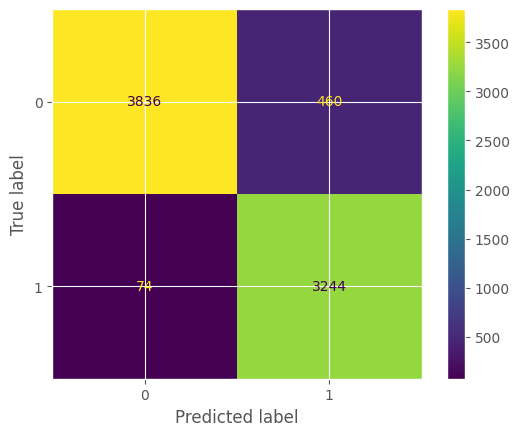

Confusion matrix for testing data


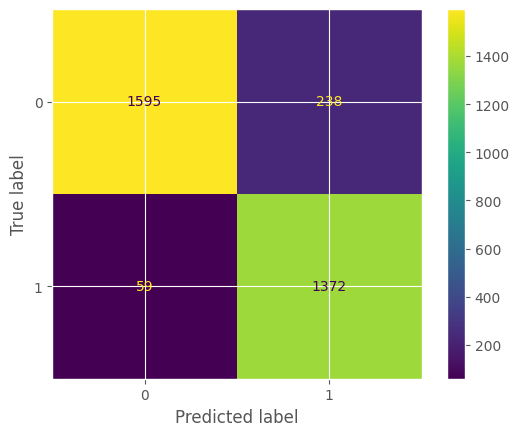

Metrics for training data:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4296
           1       0.88      0.98      0.92      3318

    accuracy                           0.93      7614
   macro avg       0.93      0.94      0.93      7614
weighted avg       0.94      0.93      0.93      7614

Metrics for testing data
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1833
           1       0.85      0.96      0.90      1431

    accuracy                           0.91      3264
   macro avg       0.91      0.91      0.91      3264
weighted avg       0.92      0.91      0.91      3264



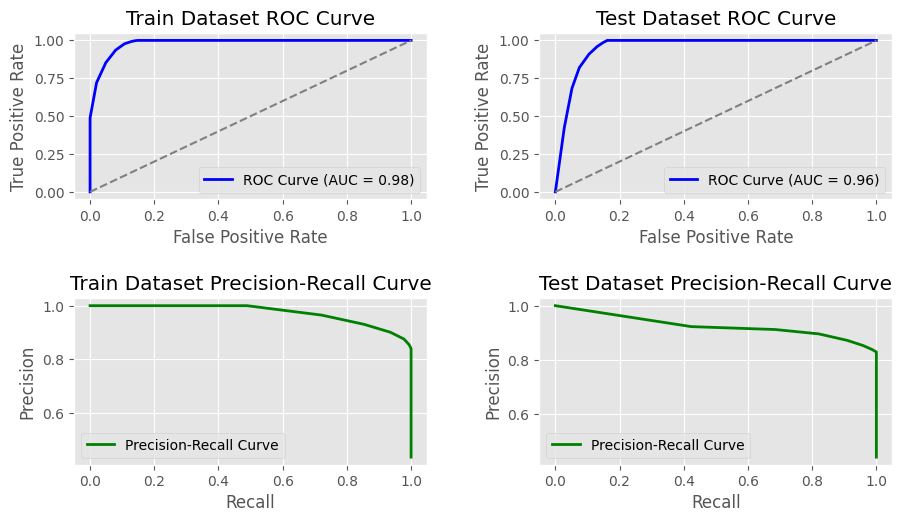

In [ ]:
# Try knn model
knn(x_train, y_train, x_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}
Confusion matrix for training data


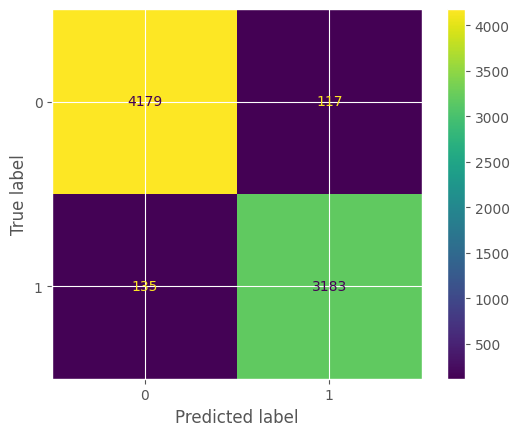

Confusion matrix for testing data


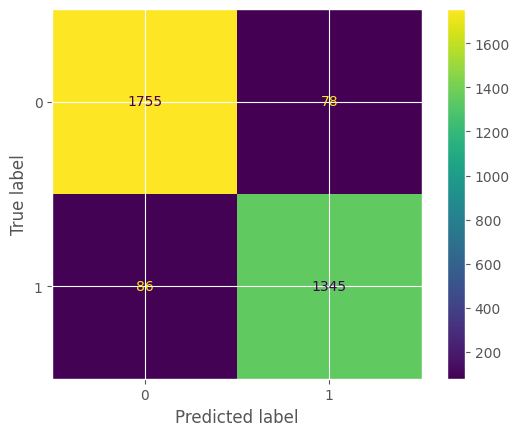

Metrics for training data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4296
           1       0.96      0.96      0.96      3318

    accuracy                           0.97      7614
   macro avg       0.97      0.97      0.97      7614
weighted avg       0.97      0.97      0.97      7614

Metrics for testing data
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1833
           1       0.95      0.94      0.94      1431

    accuracy                           0.95      3264
   macro avg       0.95      0.95      0.95      3264
weighted avg       0.95      0.95      0.95      3264



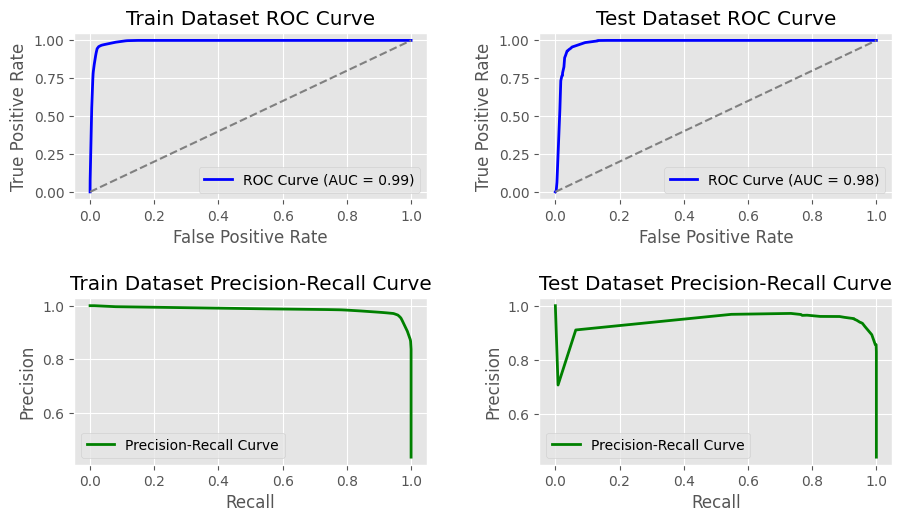

In [ ]:
# Try decision tree model
decision_tree(x_train, y_train, x_test, y_test)

The next table shows the comparison between the metrics of each model:

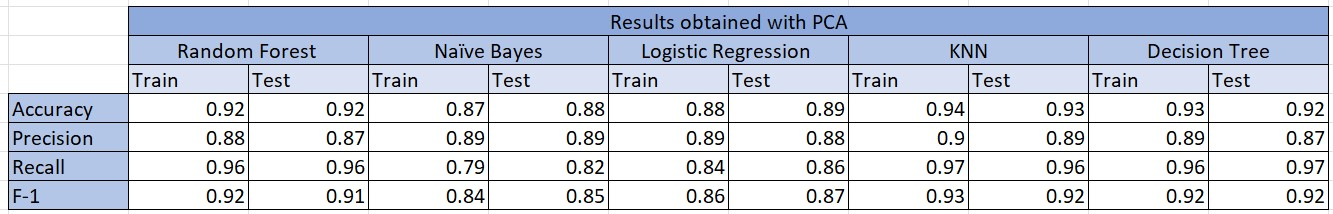

Now, we aim to use PCA to reduce the number of features. It uses the absolute variance of a feature to rotate the data, however, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our features. There are a few methods to do this, but a common way is through standardization, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).

In [ ]:
y_pca = track_metrics['genre_top']

# Set our training variables
training_variables = [ 'acousticness',
       'danceability', 'duration', 'energy',
       'instrumentalness', 'liveness', 'speechiness',
       'tempo', 'valence', 'loudness']
# Exclude target variable
x = track_metrics[training_variables]

# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_features = scaler.fit_transform(x)

Explained variance ratio for each component
-------------------------------------------
[0.46707096 0.18127864 0.09547131 0.07071397 0.05550609 0.04194569
 0.03969043 0.03396517 0.00836291 0.00599484]


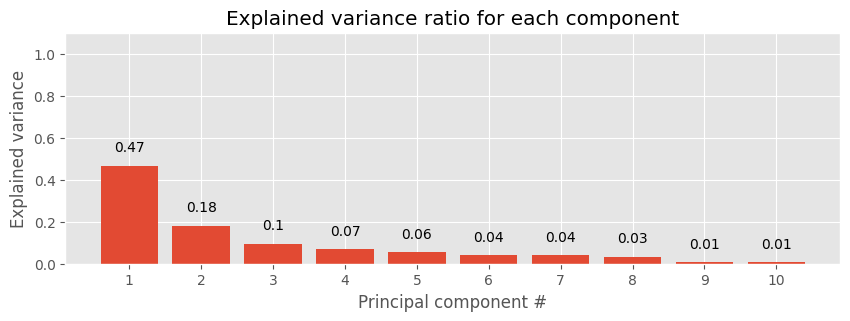

In [ ]:
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_

print('Explained variance ratio for each component')
print('-------------------------------------------')
print(exp_variance)

# plot the explained variance using a barplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.bar(
    x = np.arange(pca.n_components_) + 1,
    height = exp_variance
)

for x, y in zip(np.arange(len(training_variables)) + 1, exp_variance):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Explained variance ratio for each component')
ax.set_xlabel('Principal component #')
ax.set_ylabel('Explained variance');

Cumulative explained variance
-----------------------------
[0.46707096 0.64834959 0.74382091 0.81453487 0.87004096 0.91198666
 0.95167708 0.98564225 0.99400516 1.        ]


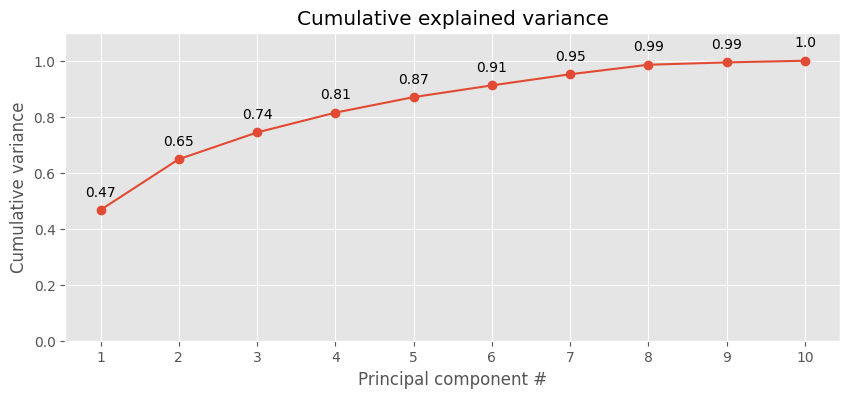

In [ ]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)
print('Cumulative explained variance')
print('-----------------------------')
print(cum_exp_variance)

# Make the cumulative explained variance plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(
    np.arange(len(training_variables)) + 1,
    cum_exp_variance,
    marker = 'o'
)

for x, y in zip(np.arange(len(training_variables)) + 1, cum_exp_variance):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Cumulative explained variance')
ax.set_xlabel('Principal component #')
ax.set_ylabel('Cumulative variance');

If we use the first 5 components, we are going to be able to explain 87% of the variance:.

In [ ]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components = 5)

# Fit and transform the scaled features using pca
x_pca = pca.fit_transform(X = scaled_features)

#divide train, test data
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_pca, test_size = 0.30, random_state = 42)

Finally, we execute each of the models to see the results with PCA.

Best hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 41}
Confusion matrix for training data


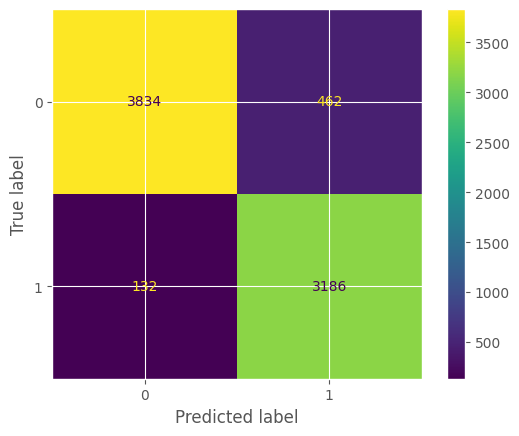

Confusion matrix for testing data


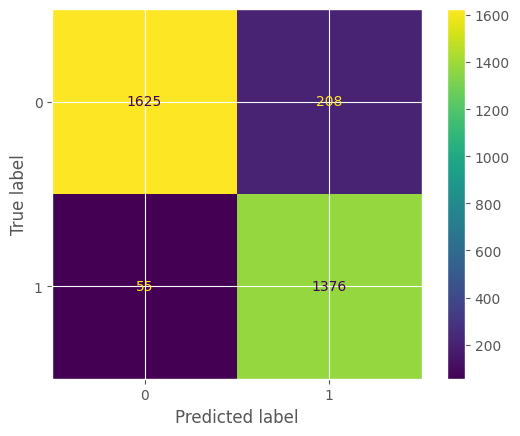

Metrics for training data:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4296
           1       0.87      0.96      0.91      3318

    accuracy                           0.92      7614
   macro avg       0.92      0.93      0.92      7614
weighted avg       0.93      0.92      0.92      7614

Metrics for testing data
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1833
           1       0.87      0.96      0.91      1431

    accuracy                           0.92      3264
   macro avg       0.92      0.92      0.92      3264
weighted avg       0.92      0.92      0.92      3264



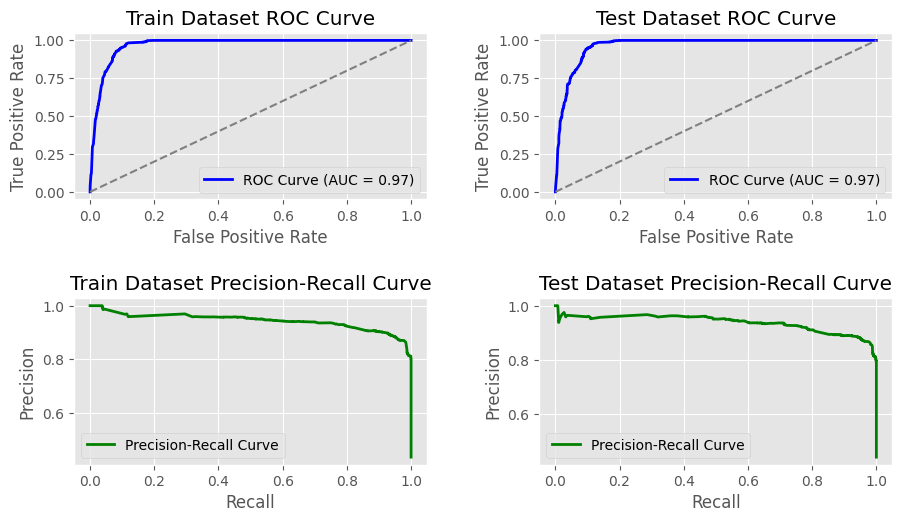

In [ ]:
# Try random forest model
random_forest(x_train, y_train, x_test, y_test)

Best hyperparameters: {'var_smoothing': 0.002154434690031882}
Confusion matrix for training data


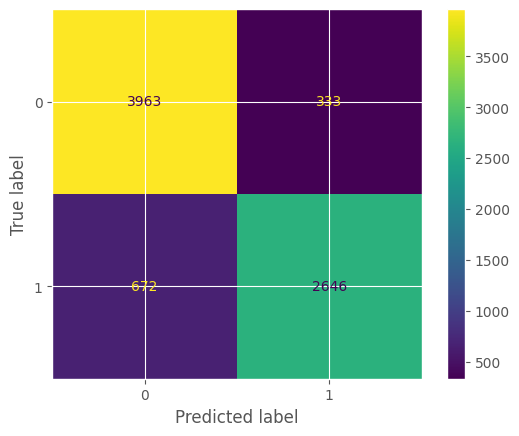

Metrics for testing data


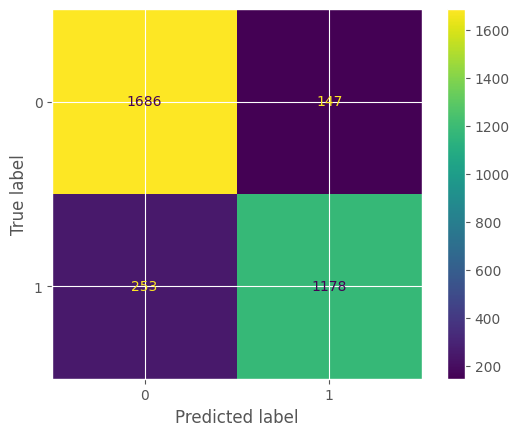

Metrics for training data:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4296
           1       0.89      0.80      0.84      3318

    accuracy                           0.87      7614
   macro avg       0.87      0.86      0.86      7614
weighted avg       0.87      0.87      0.87      7614

Metrics for testing data
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1833
           1       0.89      0.82      0.85      1431

    accuracy                           0.88      3264
   macro avg       0.88      0.87      0.87      3264
weighted avg       0.88      0.88      0.88      3264



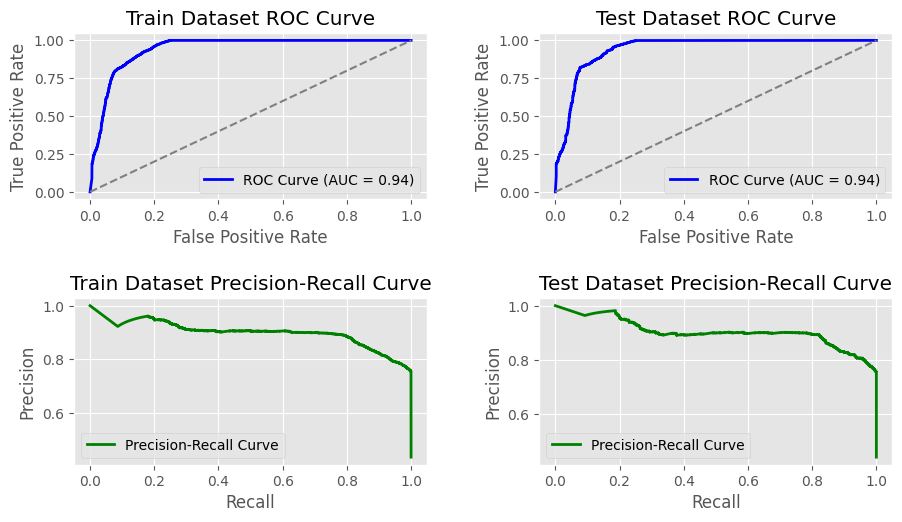

In [ ]:
# Try naive bayes model
naive_bayes(x_train, y_train, x_test, y_test)

Best hyperparameters: {'C': 0.004832930238571752, 'max_iter': 1000, 'penalty': 'l2'}
Confusion matrix for training data


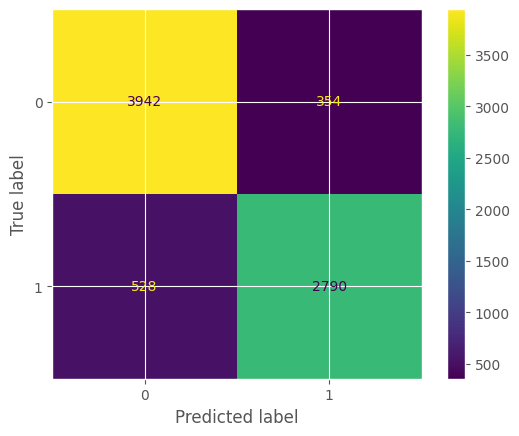

Confusion matrix for testing data


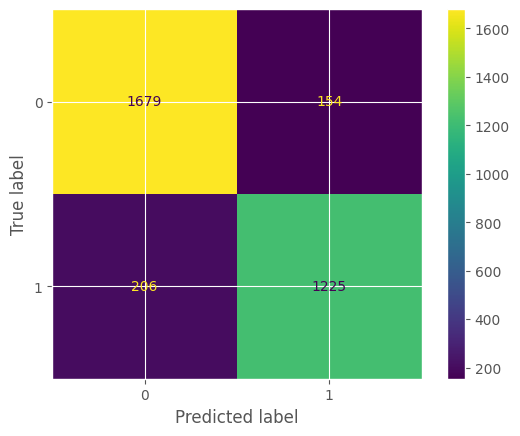

Metrics for training data:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4296
           1       0.89      0.84      0.86      3318

    accuracy                           0.88      7614
   macro avg       0.88      0.88      0.88      7614
weighted avg       0.88      0.88      0.88      7614

Metrics for testing data
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1833
           1       0.89      0.86      0.87      1431

    accuracy                           0.89      3264
   macro avg       0.89      0.89      0.89      3264
weighted avg       0.89      0.89      0.89      3264



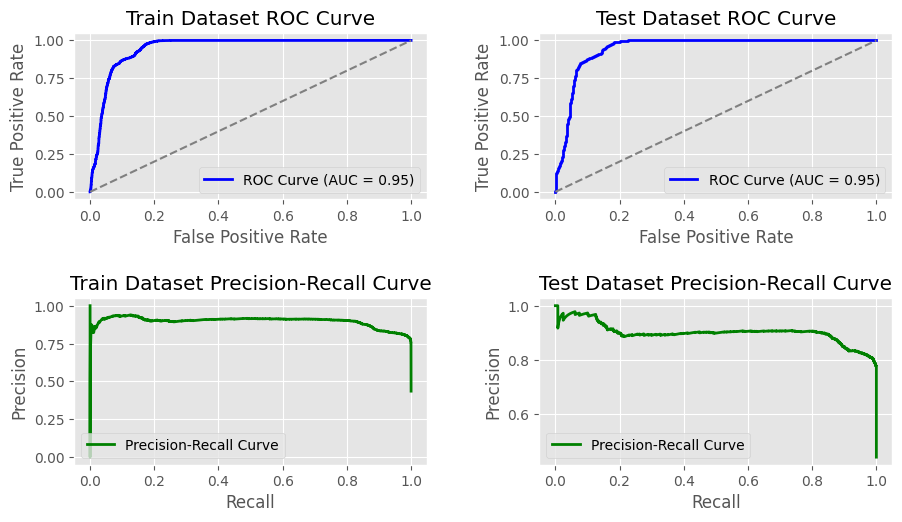

In [ ]:
# Try logistic regression model
logistic_regression(x_train, y_train, x_test, y_test)

Best hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 11, 'p': 2}
Metrics for training data


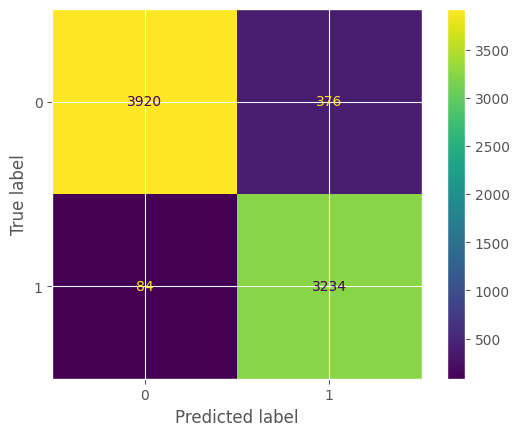

Confusion matrix for testing data


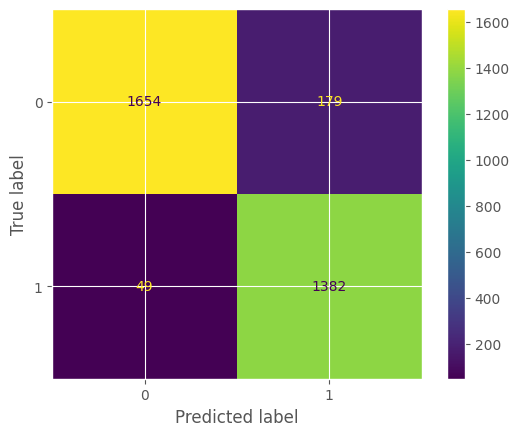

Metrics for training data:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      4296
           1       0.90      0.97      0.93      3318

    accuracy                           0.94      7614
   macro avg       0.94      0.94      0.94      7614
weighted avg       0.94      0.94      0.94      7614

Metrics for testing data
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1833
           1       0.89      0.97      0.92      1431

    accuracy                           0.93      3264
   macro avg       0.93      0.93      0.93      3264
weighted avg       0.93      0.93      0.93      3264



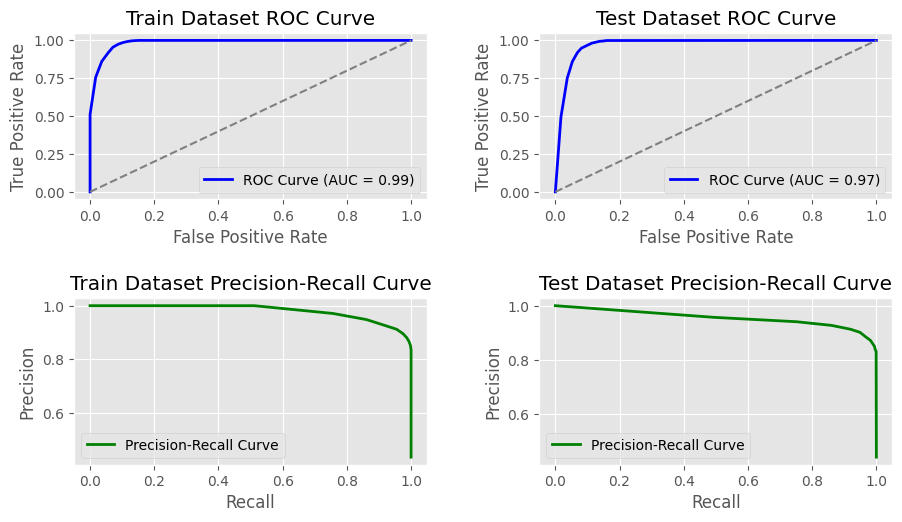

In [ ]:
# Try knn model
knn(x_train, y_train, x_test, y_test)

In [ ]:
# Try decision tree model
decision_tree(x_train, y_train, x_test, y_test)